In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from calculando_zeros import Func
from IPython import display
import sympy as sym


C:\Users\vibar\AppData\Local\Temp\ipykernel_14820\3065164837.py:8: RuntimeWarning: divide by zero encountered in log
  graph_fi, = plt.plot(x_np, np.sqrt(- np.cos(x_np) - np.sin(x_np**2) - np.log(x_np) + 2*x_np), c='blue',label="Fi(x)")
C:\Users\vibar\AppData\Local\Temp\ipykernel_14820\3065164837.py:10: RuntimeWarning: divide by zero encountered in log
  graph_f_x = plt.plot(x_np, np.cos(x_np) + np.sin(x_np**2) + np.log(x_np) + x_np**2 - 2*x_np, c='r',label="f(x)")


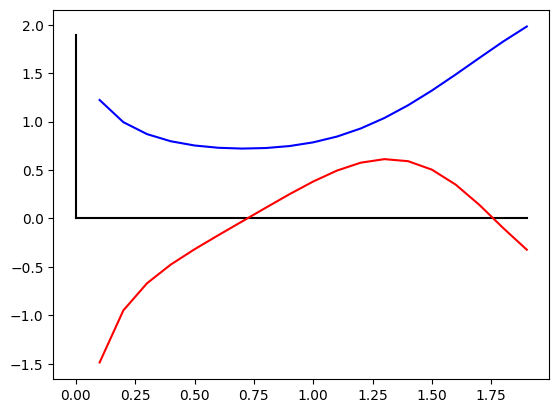

In [21]:
fig, axe = plt.subplots()

x_np = np.arange(0, 2, 0.1)
axe.plot(x_np, [0 for  _ in x_np], c='black', label='x')
axe.plot([0 for _ in x_np], x_np, c='black', label='y')


graph_fi, = plt.plot(x_np, np.sqrt(- np.cos(x_np) - np.sin(x_np**2) - np.log(x_np) + 2*x_np), c='blue',label="Fi(x)")

graph_f_x = plt.plot(x_np, np.cos(x_np) + np.sin(x_np**2) + np.log(x_np) + x_np**2 - 2*x_np, c='r',label="f(x)")





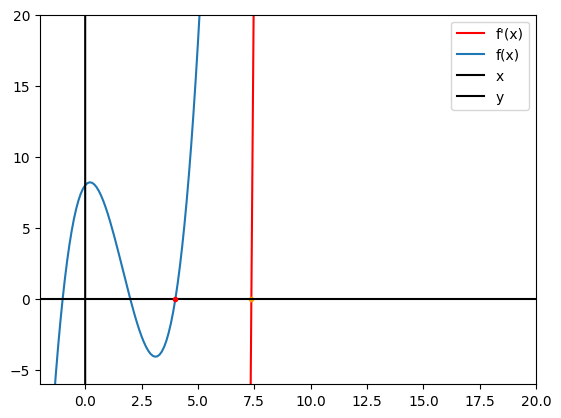

In [3]:

# Uses Sympy to express the function we want to analise in a more intuitive way
x = sym.symbols('x')
func = Func((x + 1)*(x - 2)*(x - 4), x)

# Unpack the values given by the method
res, iter_x, iter_y, _ = func.newton_method(20, 10**(-6)).values()

# Decimal -> Float conversion
iter_x, iter_y = [float(value) for value in iter_x], [float(value) for value in iter_y]

x_np = np.arange(-10, 100, 0.1)

fig, axe = plt.subplots()

# Derivative line plot
derivative_graph, = axe.plot([], c='r', label="f'(x)")

# self explanatory
where_derivative_touches_x_graph, = axe.plot([], c='orange', marker='.')

# Derivative y coordinate in the function
derivative_y_graph, = axe.plot([], c='orange', marker='.')

def animate (frames):
    """
    Frames generator function that build the animation
    """
    
    # Derivative line y creator for eat x in iter_x
    derivative_y = (x_np - iter_x[frames])*func.f(iter_x[frames], func.dfunc) + func.f(iter_x[frames])
    
    # Update the derivative line point
    derivative_graph.set_data((x_np, derivative_y))
    
    # Update the dot where the derivative line touches the abscisse
    where_derivative_touches_x_graph.set_data(([iter_x[1 if frames == 0 else frames]], [0]))
    
    # Update the dot used in the newtons method to keep track the derivative
    derivative_y_graph.set_data(([iter_x[1 if frames == 0 else frames]], [iter_y[1 if frames == 0 else frames]]))
    

    return [derivative_graph, where_derivative_touches_x_graph, derivative_y_graph]


# configurate the plot view
axe.set(xlim= [-2, 20], ylim= [-6, 20])

# Build the function's graph
axe.plot(x_np, func.f(x_np), label='f(x)')

# Build the cartesian plot
axe.plot(x_np, [0 for  _ in x_np], c='black', label='x')
axe.plot([0 for _ in x_np], x_np, c='black', label='y')

# Shows the function 0 point
axe.plot(res, 0, c='r', marker='.')

plt.legend()

anim_1 = animation.FuncAnimation(fig, animate, len(iter_x), interval=300)

display.HTML(anim_1.to_jshtml())



